# Laboratory Exercise 1 - Starter (2 points)

In this assignment, you will perform **web scraping** on the website [https://books.toscrape.com/](https://books.toscrape.com/).

Your tasks are as follows:

1. **Extract** `image_url`, `rating`, `title`, and `price` for the 20 books displayed on the main page.
2. **Organize the data** into a **pandas.DataFrame**.
3. **Visualize** the collected data according to the given requirements.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_1_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_1_12346.ipynb`.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [2]:
url = "https://books.toscrape.com/"

In [3]:
response = requests.get(url)

In [4]:
page_element = BeautifulSoup(response.text, "html.parser")

In [5]:
product_elements = page_element.select("article.product_pod")

**(0.2 points)** Implement the `get_image_url` function to return the image URL of a given product element using **BeautifulSoup**. For example, the first product on the page has the image URL `"media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"`.

In [15]:
### AUTOMATICALLY GRADED TASK
def get_image_url(product_element):
    "Get the URL of the image from the given product element using BeautifulSoup."
    # YOUR CODE HERE
    return product_element.select_one('img').get('src')

Test your implementation by running the following cell.

In [139]:
### TEST
assert get_image_url(product_elements[0]) == "media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"

**(0.2 points)** Implement the `get_rating` function to return the product’s rating as an integer between 1 and 5. For example, the first product on the page has a rating of `3`.

In [140]:
### AUTOMATICALLY GRADED TASK
ratings_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

def get_rating(product_element):
    "Get the rating (1-5) of the given product element."
    # YOUR CODE HERE
    rating_str = product_element.select_one('.star-rating').get('class')[1]
    return int(ratings_map[rating_str])

Test your implementation by running the following cell.

In [141]:
### TEST
assert get_rating(product_elements[0]) == 3

**(0.2 points)** Implement the `get_title` function to return the full title of the given product as a string. For example, the first product on the page has the title `"A Light in the Attic"`.

In [142]:
### AUTOMATICALLY GRADED TASK
def get_title(product_element):
    "Get the full-length title of the given product element."

    # YOUR CODE HERE
    return product_element.select_one('h3 a').get('title')

Test your implementation by running the following cell.

In [143]:
### TEST
assert get_title(product_elements[0]) == "A Light in the Attic"

**(0.2 points)** Implement the `get_price` function to return the product’s price as a float. For example, the first product on the page has a price of `51.77`.

In [144]:
def get_price(product_element):
    "Get the price of the given product element."

    # YOUR CODE HERE
    return float(product_element.select_one('.price_color').text.split('Â£')[1])

Test your implementation by running the following cell.

In [145]:
### TEST
assert get_price(product_elements[0]) == 51.77

In [146]:
def get_attributes(product_element):
    return {
        "image_url": get_image_url(product_element),
        "rating": get_rating(product_element),
        "title": get_title(product_element),
        "price": get_price(product_element),
    }

In [147]:
get_attributes(product_elements[0])

{'image_url': 'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'rating': 3,
 'title': 'A Light in the Attic',
 'price': 51.77}

In [68]:
product_data = [get_attributes(product_element) for product_element in product_elements]

In [148]:
df = pd.DataFrame(product_data)

In [149]:
df.head()

,image_url,rating,title,price
0,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c...,3,A Light in the Attic,51.77
1,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f...,1,Tipping the Velvet,53.74
2,media/cache/3e/ef/3eef99c9d9adef34639f51066202...,1,Soumission,50.10
3,media/cache/32/51/3251cf3a3412f53f339e42cac213...,4,Sharp Objects,47.82
4,media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c...,5,Sapiens: A Brief History of Humankind,54.23


***If you were not able to complete the previous tasks successfully, you may uncomment the following line to continue with the next steps.***

In [ ]:
# df = pd.read_csv("products.csv")

**(0.2 points)** Create a visualization showing the number of products for each rating (1-5).

In [155]:
### MANUALLY GRADED TASK
def plot_counts_by_rating(df):
    "Plot the count of products by rating."""

    # YOUR CODE HERE
    # df['rating'].hist()
    # plt.hist(df["rating"], bins=5) # shows decimal numbers in x axis (?)
    sns.countplot(x="rating", data=df)

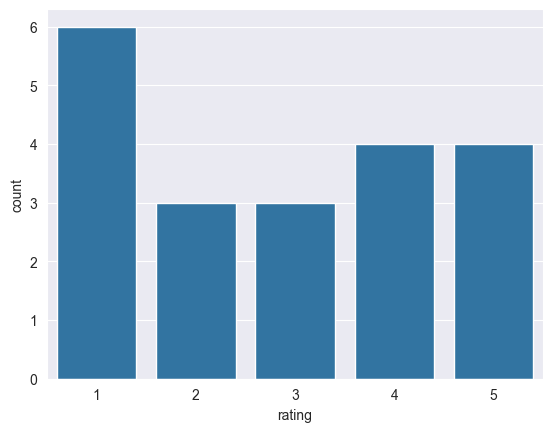

In [156]:
plot_counts_by_rating(df)

**(0.2 points)** Create a visualization showing the distribution of product prices.

In [160]:
### MANUALLY GRADED TASK
def plot_price_distribution(df):
    """Plot the price distribution of the products."""

    # YOUR CODE HERE
    df['price'].hist()
    # sns.boxplot(x=df['price'])

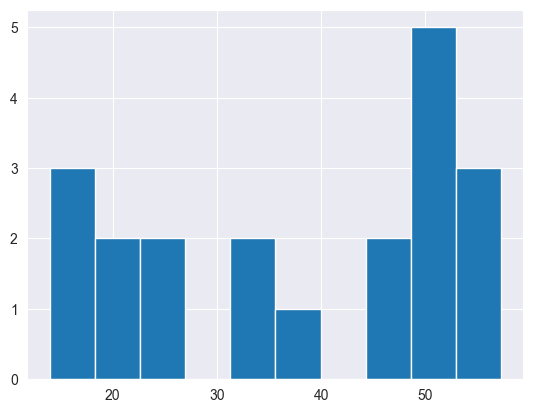

In [161]:
plot_price_distribution(df)

**(0.2 points)** Create a visualization showing the distribution of product title lengths.

In [172]:
### MANUALLY GRADED TASK
def plot_title_length_distribution(df):
    """Plot the distribution of the title lengths."""

    # YOUR CODE HERE
    # lengths_arr1 = df['title'].str.len()
    # lengths_arr2 = df['title'].apply(len)
    lengths_arr3 = df['title'].apply(lambda x: len(x))
    # lengths_arr3.hist()
    plt.hist(lengths_arr3, bins=15)

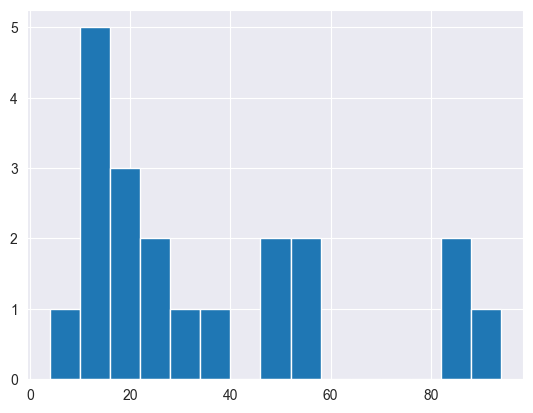

In [173]:
plot_title_length_distribution(df)

**(0.2 points)** Create box plots showing the distribution of product prices for each rating.

In [174]:
### MANUALLY GRADED ANSWER
def plot_price_distribution_per_rating(df):
    """Plot the price distribution of the products per rating."""

    # YOUR CODE HERE
    sns.boxplot(df, x='rating', y='price')

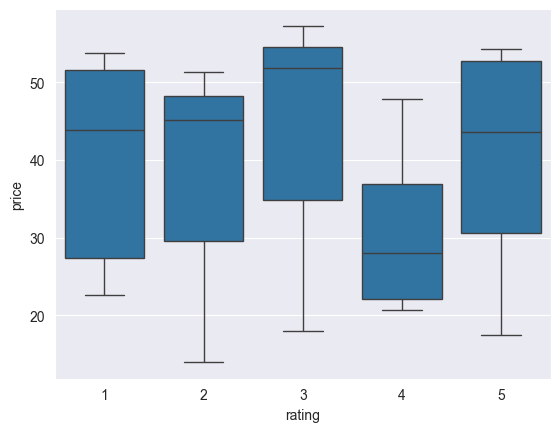

In [175]:
plot_price_distribution_per_rating(df)

**(0.2 points)** Create a heatmap showing the Pearson correlation between the numeric variables in the dataset.

In [110]:
### MANUALLY GRADED ANSWER
def plot_corr_heat_map(df):
    """Plot the Pearson correlation between the numeric variables in the dataset using a heat map."""

    # YOUR CODE HERE
    sns.heatmap(df.corr(numeric_only=True), annot=True)

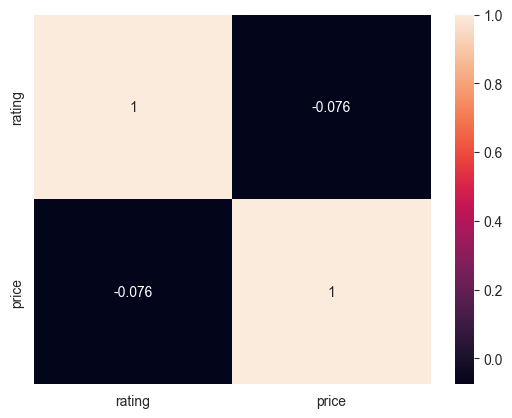

In [111]:
plot_corr_heat_map(df)

**(0.2 points)** Compute the `count`, `mean`, `std`, `min`, `25%`, `median`, `75%`, and `max` statistics of product prices grouped by rating (1-5).

In [137]:
### MANUALLY GRADED ANSWER
def compute_descriptive_stats_for_price_per_rating(df):
    """
    Compute the `count`, `mean`, `std`, `min`, `25% quantile`, `median`, `75% quantile`, and `max` statistics
    for the product's prices per rating (1-5). Return them as a `pandas.DataFrame`.
    """

    # YOUR CODE HERE

    # to get all values manually
    # return df.groupby("rating")["price"].agg(
    #     count="count",
    #     min="min",
    #     q25=lambda x: x.quantile(0.25)
    #     .... max(), median(), etc.
    # )

    # shorthand approach
    return (
        df.groupby("rating")["price"]
        .describe(percentiles=[0.25, 0.5, 0.75])
        .rename(columns={"50%": "median"})
        .round(2)
    )

In [138]:
compute_descriptive_stats_for_price_per_rating(df)

,count,mean,std,min,25%,median,75%,max
rating,,,,,,,,
1,6.0,40.02,14.18,22.65,27.31,43.84,51.64,53.74
2,3.0,36.83,20.02,13.99,29.58,45.17,48.25,51.33
3,3.0,42.32,21.30,17.93,34.85,51.77,54.51,57.25
4,4.0,31.10,12.46,20.66,22.12,27.97,36.96,47.82
5,4.0,39.75,17.19,17.46,30.63,43.66,52.78,54.23
